<a href="https://colab.research.google.com/github/kimvkemenade/DM_team16/blob/main/DM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 (Group 16)**


# Cleaning data

In [2]:
#importing the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
# downloading the dataset
#!kaggle datasets download rodsaldanha/arketing-campaign

# unzipping the dataset
#!unzip arketing-campaign.zip

df_raw = pd.read_csv('marketing_campaign.csv', sep = ';')
marketing_df = df_raw.copy()

In [4]:
print("Shape of the dataframe:", marketing_df.shape)
marketing_df.info()

Shape of the dataframe: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Num

In [5]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


| #  | Variable               | Description                                                                 |
|----|------------------------|-----------------------------------------------------------------------------|
| 1  | AcceptedCmp1           | 1 if customer accepted the offer in the 1st campaign, 0 otherwise           
| 2  | AcceptedCmp2           | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise           |
| 3  | AcceptedCmp3           | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise           |
| 4  | AcceptedCmp4           | 1 if customer accepted the offer in the 4th campaign, 0 otherwise           |
| 5  | AcceptedCmp5           | 1 if customer accepted the offer in the 5th campaign, 0 otherwise           |
| 6  | Response      | 1 if customer accepted the offer in the last campaign, 0 otherwise          |
| 7  | Complain               | 1 if customer complained in the last 2 years                                |
| 8  | DtCustomer             | date of customer’s enrolment with the company                               |
| 9  | Education              | customer’s level of education                                               |
| 10 | Marital                | customer’s marital status                                                   |
| 11 | Kidhome                | number of small children in customer’s household                            |
| 12 | Teenhome               | number of teenagers in customer’s household                                 |
| 13 | Income                 | customer’s yearly household income                                          |
| 14 | MntFishProducts        | amount spent on fish products in the last 2 years                           |
| 15 | MntMeatProducts        | amount spent on meat products in the last 2 years                           |
| 16 | MntFruits              | amount spent on fruits products in the last 2 years                         |
| 17 | MntSweetProducts       | amount spent on sweet products in the last 2 years                          |
| 18 | MntWines               | amount spent on wine products in the last 2 years                           |
| 19 | MntGoldProds           | amount spent on gold products in the last 2 years                           |
| 20 | NumDealsPurchases      | number of purchases made with discount                                      |
| 21 | NumCatalogPurchases    | number of purchases made using catalogue                                    |
| 22 | NumStorePurchases      | number of purchases made directly in stores                                 |
| 23 | NumWebPurchases        | number of purchases made through company’s web site                         |
| 24 | NumWebVisitsMonth      | number of visits to company’s web site in the last month                    |
| 25 | Recency                | number of days since the last purchase                                      |

## Checking the balanceness of marketing campaign variables

In [6]:
not_accepted_df = marketing_df[(marketing_df['AcceptedCmp1'] == 0) &
                 (marketing_df['AcceptedCmp2'] == 0) &
                 (marketing_df['AcceptedCmp3'] == 0) &
                 (marketing_df['AcceptedCmp4'] == 0) &
                 (marketing_df['AcceptedCmp5'] == 0) &
                 (marketing_df['Response'] == 0)]

# Display the filtered DataFrame
not_accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0


In [7]:
columns_to_check = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
accepted_df = marketing_df[(marketing_df[columns_to_check] != 0).any(axis=1)]

# Display the filtered DataFrame
accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,...,0,0,1,0,0,0,0,3,11,0
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0


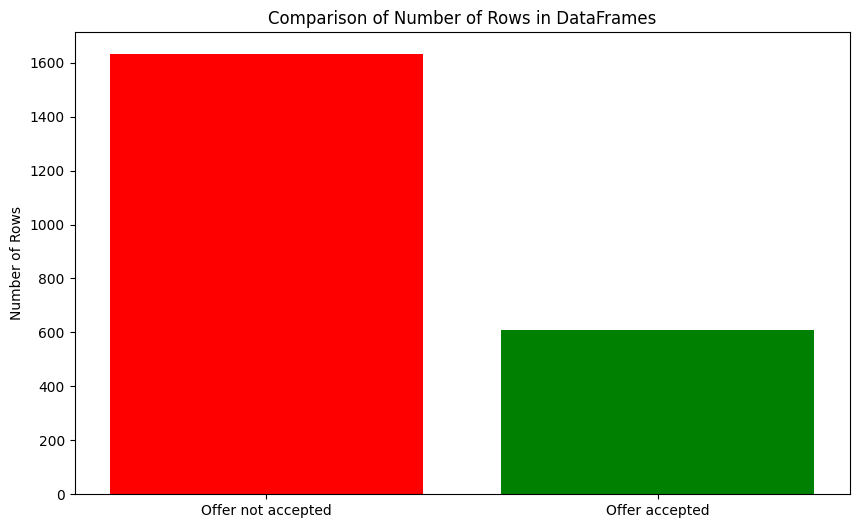

In [8]:
num_rows_filtered_df = len(not_accepted_df)
num_rows_filtered_non_zero_df = len(accepted_df)

# Data for plotting
data = {
    'DataFrame': ['Offer not accepted', 'Offer accepted'],
    'Number of Rows': [num_rows_filtered_df, num_rows_filtered_non_zero_df]
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(plot_df['DataFrame'], plot_df['Number of Rows'], color=['red', 'green'])
plt.ylabel('Number of Rows')
plt.title('Comparison of Number of Rows in DataFrames')
plt.show()

As can be seen in the graph above, not many consumers have accepted any offers. Additionally, since our purpose is to predict whether marketing campaings work in general and also because there is no description what each individual marketing campaign is, we are creating a new variable `AcceptedCmp` that is 1 if a customer accepted any of the six campaigns (including `Response`) and 0 if a customer did not accept any.

To have a better understanding of the data we explored the number of unique values each cell has

In [9]:
[(column_name, marketing_df[column_name].nunique()) for column_name in list(marketing_df.columns)]

[('ID', 2240),
 ('Year_Birth', 59),
 ('Education', 5),
 ('Marital_Status', 8),
 ('Income', 1974),
 ('Kidhome', 3),
 ('Teenhome', 3),
 ('Dt_Customer', 663),
 ('Recency', 100),
 ('MntWines', 776),
 ('MntFruits', 158),
 ('MntMeatProducts', 558),
 ('MntFishProducts', 182),
 ('MntSweetProducts', 177),
 ('MntGoldProds', 213),
 ('NumDealsPurchases', 15),
 ('NumWebPurchases', 15),
 ('NumCatalogPurchases', 14),
 ('NumStorePurchases', 14),
 ('NumWebVisitsMonth', 16),
 ('AcceptedCmp3', 2),
 ('AcceptedCmp4', 2),
 ('AcceptedCmp5', 2),
 ('AcceptedCmp1', 2),
 ('AcceptedCmp2', 2),
 ('Complain', 2),
 ('Z_CostContact', 1),
 ('Z_Revenue', 1),
 ('Response', 2)]

One thing that stands out is that 'Z_CostContact', 'Z_Revenue' only have one unique value, indicating it is the same for all rows. Additionally, ID number of unique values corresponds to the number of rows in the dataset (not surpresing considering they are used to uniquely identify each customer). Columns with only 2 unique values correspond to our binary variables.


Based on this results, we decided to remove our constant variables.

In [10]:
#some cleaning
#getting rid of 'Z_CostContact' and 'Z_Revenue' constant variables and 'ID'
marketing_df = marketing_df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis=1)

#creating AcceptedCmp variable
marketing_df['AcceptedCmp'] = marketing_df[['AcceptedCmp1', 'AcceptedCmp2',
                                            'AcceptedCmp3',
                                            'AcceptedCmp4', 'AcceptedCmp5',
                                            'Response']].max(axis=1)

#dropping unuseful variables
marketing_df = marketing_df.drop(['AcceptedCmp1', 'AcceptedCmp2',
                                  'AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'Response'], axis=1)

marketing_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,46,27,15,5,5,3,6,5,0,0


## Missing values

In [11]:
# Number of missing values
print(marketing_df.isnull().sum())

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
AcceptedCmp             0
dtype: int64


Since only 24 rows have missing values, we are dropping them, believing it will not affect the data:

In [12]:
# Dropping NAs
marketing_df = marketing_df.dropna()

## Outliers

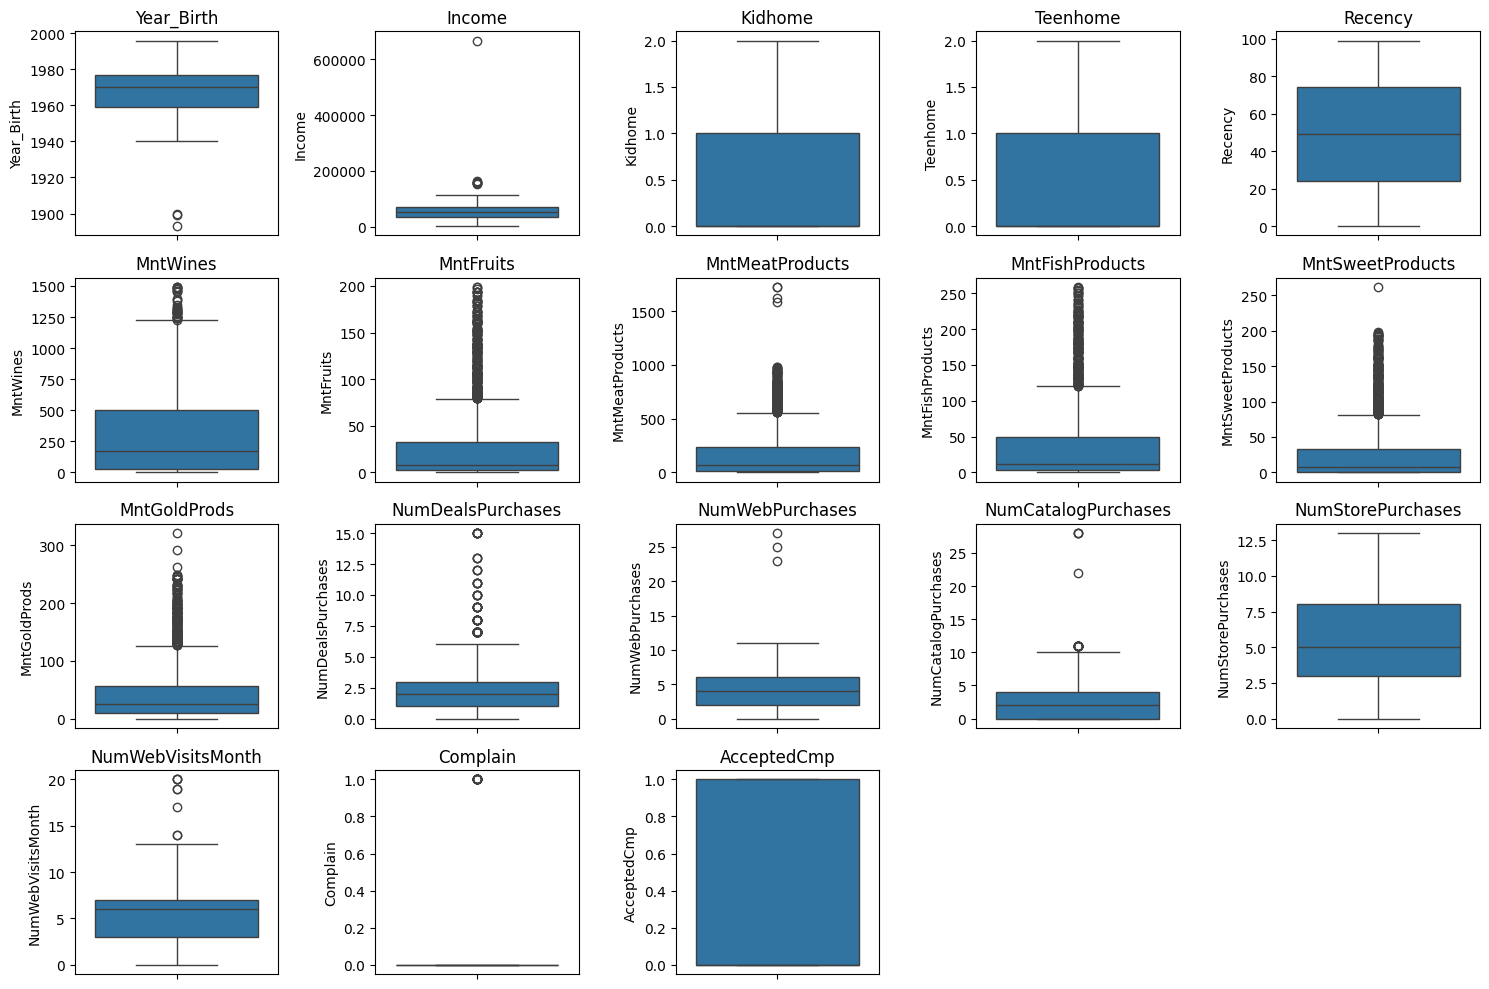

In [13]:
# selecting only numeric variables to check for the ouliers
numerical_columns = marketing_df.select_dtypes(include = ['float64', 'int64']).columns

# create a figure with barplot subplots
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//5 + 1, 5, i)
    sns.boxplot(y = marketing_df[feature], showfliers = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

It seems like variables `Income`, `NumWebPurchases`, `NumCatalogPurchases` have some outliers.

To further investigate:

In [14]:
# removing outliers for income as there are exceptionally rich customers in our dataset as the plot above illustrates
# creating a function to simplify code
def remove_outliers_iqr(df, selected_columns):
    Q1 = df[selected_columns].quantile(0.25)
    Q3 = df[selected_columns].quantile(0.75)
    IQR = Q3 - Q1

    #
    outlier_mask = ~((df[selected_columns] < (Q1 - 1.5 * IQR)) |
                     (df[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Print summary of removed rows
    print(f"Original dataset size: {len(df)}")
    print(f"Number of rows removed: {len(df) - sum(outlier_mask)}")
    print(f"New dataset size: {sum(outlier_mask)}")

    return df[outlier_mask]
# using function and selecting columns I want to remove outliers from (based on boxplots results)
marketing_df = remove_outliers_iqr(marketing_df, ['Income'])

Original dataset size: 2216
Number of rows removed: 8
New dataset size: 2208


There is a significant bias in the data, if we want to predict this we need to deal with this unbalancedness. Additionally, since we are gonna use models that use distance metrics, we need to standardize our features. The codes for these tasks are located in the **Models** section.

# EDA

* **include some graphs**
* **association rule analysis**

In [15]:
marketing_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1968.807065,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,2.316576,4.098279,2.644928,5.819293,5.334239,0.009511,0.274004
std,11.991913,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,1.885450,2.736724,2.798441,3.241866,2.413837,0.097081,0.446112
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


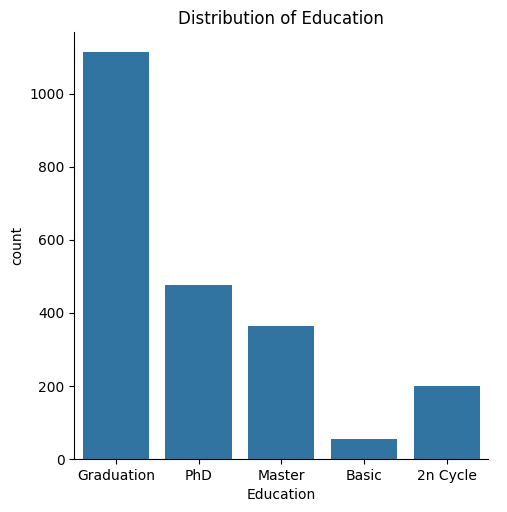

In [16]:
# making a barplot that illustrates all categories of education and their count
sns.catplot(data=marketing_df, x="Education", kind="count")
plt.title('Distribution of Education')
plt.show()

Most of the users graduated, due to the lack of information it is unclear whether this means graduated from University, High School, or Middle School, etc. The least common level of education of respondents' is basic which means primary and lower secondary education (elementary and middle school). After further research it was discovered that most 2n cycle (second cycle) programs award a master degree (Second-cycle Programmes, 2023), so this category will be combined with Master Education.

In [17]:
#replacing '2n Cycle' with 'Master'
marketing_df['Education'] = marketing_df['Education'].replace({'2n Cycle': 'Master'})
# looking at the new distribution
marketing_df['Education'].value_counts() # actual count/values

Graduation    1113
Master         564
PhD            477
Basic           54
Name: Education, dtype: int64

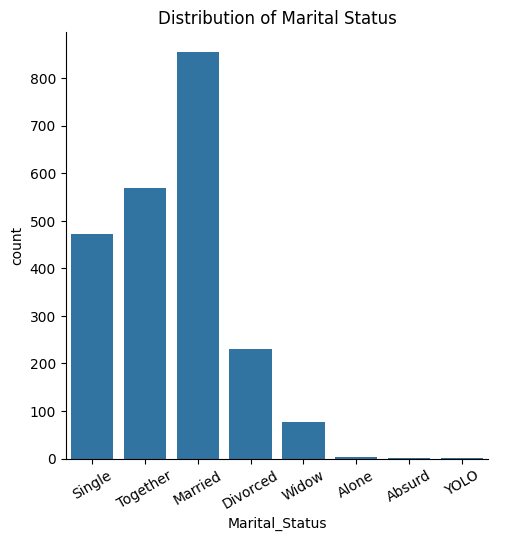

In [18]:
# making a barplot that illustrates all categories of marital status and their count
sns.catplot(data=marketing_df, x="Marital_Status", kind="count",)
plt.title('Distribution of Marital Status') # title
plt.xticks(rotation=30) # rotating labels so it is visible
plt.show()

In [19]:
# counting marital statuses
marketing_df['Marital_Status'].value_counts()

Married     854
Together    569
Single      471
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Above, we can see that there are some interesting `Marital_Status` categories, such as *Alone*, *Absurd*, and *YOLO*. We have decided to add *Alone* customers to the Singles, and get rid of the *Absurd* and *YOLO* ones.

In [20]:
#replacing 'Alone' with 'Single'
marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace({'Alone': 'Single'})

#remowing rows where Marital_Status is 'Absurd' or 'YOLO'
marketing_df = marketing_df[~marketing_df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# counting marital statuses
marketing_df['Marital_Status'].value_counts()

Married     854
Together    569
Single      474
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

In [21]:
# changing date of birth to 'Age'
marketing_df.loc[:, 'Age'] = datetime.datetime.now().year - marketing_df['Year_Birth']
marketing_df['Age'].describe()

C:\Users\daran\AppData\Local\Temp\ipykernel_17936\3382407818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df.loc[:, 'Age'] = datetime.datetime.now().year - marketing_df['Year_Birth']


count    2204.000000
mean       55.202359
std        11.988415
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [22]:
# remove observations with the ages above 99
marketing_df = marketing_df[marketing_df['Age'] <= 99]

# categorize the ages
def categorize_age(age):
    if age <= 35:
        return 'Young'
    elif 36 <= age <= 59:
        return 'MiddleAge'
    else:
        return 'Elderly'

marketing_df['Age'] = marketing_df['Age'].apply(categorize_age)

marketing_df['Age'].value_counts()

MiddleAge    1342
Elderly       770
Young          89
Name: Age, dtype: int64

In [134]:
# Checking whether there are duplicated values
marketing_df.duplicated().sum()

190

In [23]:
# getting rid of the duplicates
marketing_df.drop_duplicates(inplace=True)

In [24]:
# checking the number of rows
marketing_df.shape

(2011, 22)

In [25]:
#dropping Year_Birth variable
marketing_df = marketing_df.drop(['Year_Birth'], axis=1)
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,51646.757832,0.444058,0.509199,48.920438,305.405768,26.311785,165.567379,37.424664,27.228245,43.784187,2.323222,4.114371,2.637494,5.804078,5.343113,0.009448,0.275982
std,20704.906030,0.536460,0.546622,28.959616,336.959244,39.749661,219.020333,54.605283,41.496953,51.513966,1.883670,2.756241,2.797541,3.231900,2.424507,0.096765,0.447119
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35364.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,51411.000000,0.000000,0.000000,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,68211.000000,1.000000,1.000000,74.000000,506.000000,33.000000,230.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


- **`Income`**

- **`Kidhome`**

- **`Teenhome`**

- **`Recency`**

- **`Complain`** - a binary variable. If the value is 1, it means the customer complained. The mean is approximately 0.009, meaning about 0.9% of customers have complained.

- **`AcceptedCmp`** - a binary variable, thus minimum value is 0 and maximum is 1. The mean of 0.273 shows that 27.3% of customers accepted the campaign. The standard deviation of 0.4454 tells us there is a variability in customers' responses to campaigns.

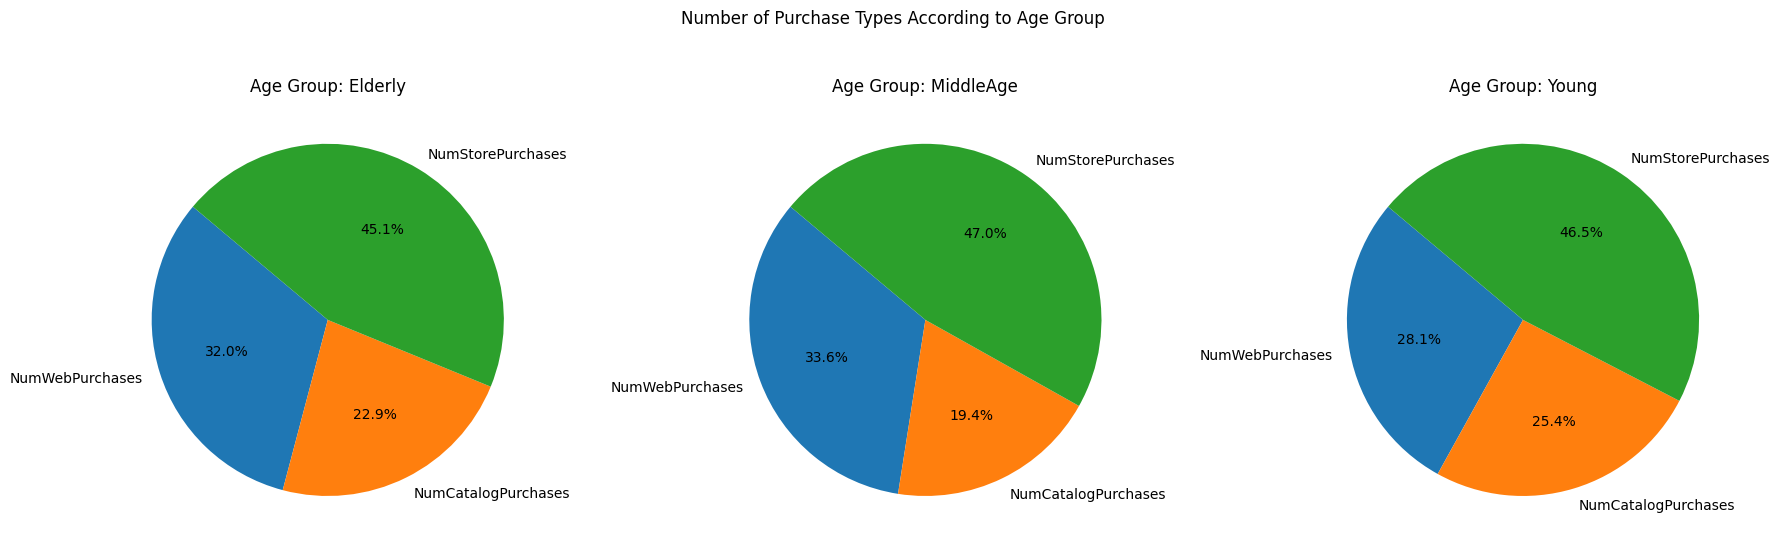

In [26]:
# Analyzing purchasing ways according to 'Age'
age_purchase_summary = marketing_df.groupby("Age")[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum()

# setting up subplots
fig, axes = plt.subplots(1, len(age_purchase_summary.index), figsize=(18, 6))

# making a pie chart in each subplot
for i, age in enumerate(age_purchase_summary.index):
    purchases = age_purchase_summary.loc[age]
    axes[i].pie(purchases, labels=purchases.index, autopct = '%1.1f%%', startangle = 140)
    axes[i].set_title(f"Age Group: {age}")

plt.suptitle("Number of Purchase Types According to Age Group")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

From the pie charts above, we can see that the distribution of the Purchasing channels is more or less the same among three age groups with Store Purchases being the most popular option, and Catalog purchases the least. Elderly people using catalogs slightly more compared to other two age groups.

## Clustering
### K Means

This is a distance-based algorithm so prior to training it it is crucial to standardized the variables so they have equal weight to the model.

Since StandardScalar() only works with numeric data, we first need to handle our non-numeric features (Education, Marital_Status, Dt_Customer, Age)

Since Marital_status, Age, and Education are categorical one hot encoding will be implemented.

As we previously saw when looking at number of unique values in each row, Dt_Customer has 662 unique values. This would mean adding 662 additional columns to our dataset if we were to treat date as a dummy. This in practice makes no sense since it is not a categorical variable and would increase dimesnsionality by a lot. Thus, this varaible is dropped before performing clustering.

ID is also removed because this column is only used to identify customers, it does not contain meaningful patterns that would help in clustering. Specially when considering that all observations of this variable are unique.


In [27]:
# performing one-hot scaling on categroical variables so you can
df_encoded = pd.get_dummies(marketing_df, columns= ["Education", "Marital_Status", 'Age'], dtype='int') # making output an int instead of boolean

# dropping Dt_Customer as this variable is non_numeric and one-hot-encoding would result in 662 additional columns
df_encoded = df_encoded.drop(["Dt_Customer"], axis = 1)

# scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # standardizing data
marketing_normalized = scaler.fit_transform(df_encoded)

#turning output into a dataframe
marketing_df_normalized = pd.DataFrame(marketing_normalized, index=df_encoded.index, columns=df_encoded.columns)

In [29]:
marketing_df.info() # looking at the new dataset after adding/removing features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2011 non-null   object 
 1   Marital_Status       2011 non-null   object 
 2   Income               2011 non-null   float64
 3   Kidhome              2011 non-null   int64  
 4   Teenhome             2011 non-null   int64  
 5   Dt_Customer          2011 non-null   object 
 6   Recency              2011 non-null   int64  
 7   MntWines             2011 non-null   int64  
 8   MntFruits            2011 non-null   int64  
 9   MntMeatProducts      2011 non-null   int64  
 10  MntFishProducts      2011 non-null   int64  
 11  MntSweetProducts     2011 non-null   int64  
 12  MntGoldProds         2011 non-null   int64  
 13  NumDealsPurchases    2011 non-null   int64  
 14  NumWebPurchases      2011 non-null   int64  
 15  NumCatalogPurchases  2011 non-null   i

To imporve our model dimensionality reduction with principal component analysis was applied. This approach was used to simplify our dataset by removing redundant information and maintaining the most important. It is important to note that prior to doing this our silhoutte scores were extremely low

In [30]:
from sklearn.decomposition import PCA
pca = PCA(0.95, random_state =42)  # Initializing PCA by selecting the number of compnenets that represents 95% of variance
reduced_data = pca.fit_transform(marketing_df_normalized)

# print number of componenets
print(f"Number of components selected to explain 95% variance: {pca.n_components_}")

Number of components selected to explain 95% variance: 21


To determine the number of principal componenets  a Scree Plot will be used. The y variable in this plot measures the explained variance ratio. The explained variance ratio represents the proportion of the total variance in the data that each principal component accounts for. While the x variable is the number of components.

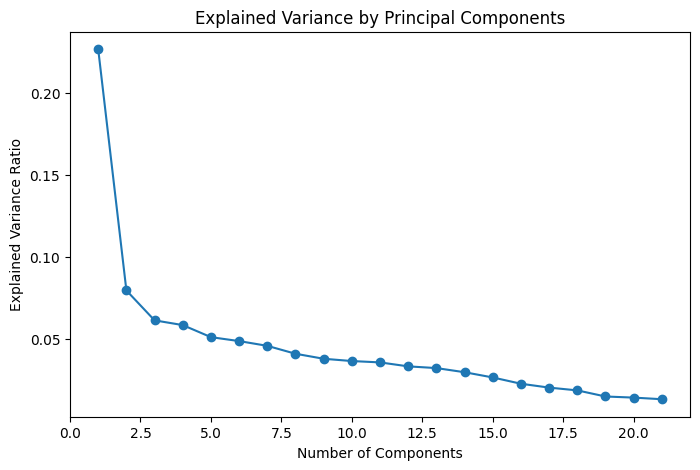

In [31]:
# visualization to help us determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.show()

According to the scree plot, the optimal number of components is around 3 (the "elbow") as from this point onwards explained variance flattens out as the number of components increases. With this information we will reduce the dimensionality of our data.



In [32]:
# applying PCA with 2 components
pca_3 = PCA(n_components=3, random_state=42)
pca_data = pca_3.fit_transform(marketing_df_normalized)

Now that dimentionality has been reduced we can move on with applying the K means algorithm. To use this model, we need to predetermine the number of clusters (K), so multiples K will be considered at the beginning to compare them and select the optimal number. To determine what K value we should use the elbow method will be applied along with Silhouette Analysis

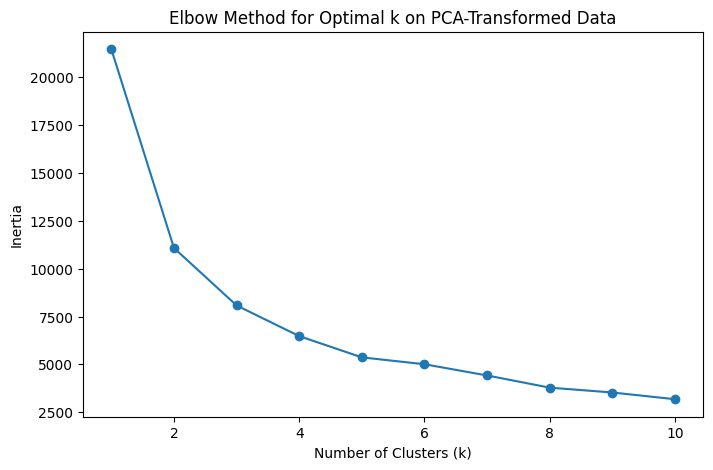

In [33]:
# performing K-means clustering for each number of clusters (1-11 clusters)
from sklearn.cluster import KMeans
inertia = []  # list to hold sum of squared errors for each k
k_values = range(1, 11)  # k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)  # inertia aka sum of squared distances to nearest cluster center

# plotting the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k on PCA-Transformed Data")
plt.show()

Based on this illustration and the elbow method, we would argue that the optimal K value is around 3-4 as from this point onwards inertia diminishing at a lower rate. Thus, 3 or 4 according to this graph is the optimal number of clusters.

Another common measure that is used to determine the ideal number of clusters is the Silhouette Score. The score ranges from -1 to 1. A score close to one indicates that the sample is well defined in its cluster as it is far away from neighboring ones. Close to zero means that the sample is extremely close to belonging to two different clusters that are close to each other. While -1 indicates that samples may have been assigned to the wrong clusters (Selecting the Number of Clusters With Silhouette Analysis on KMeans Clustering, n.d.).

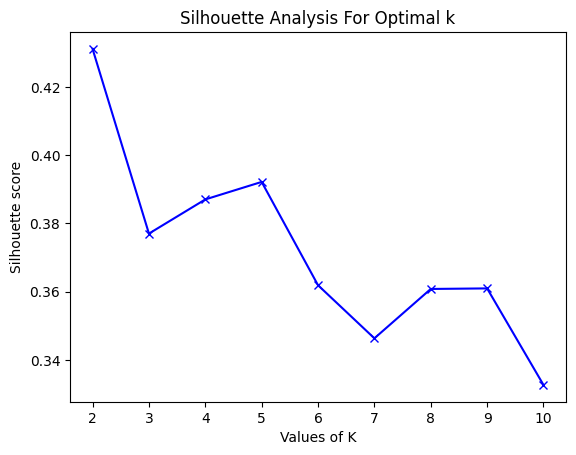

In [34]:
from sklearn.metrics import silhouette_score

silhouette_avg = [] # list where avg silhoutte scores of each k means algorithm will go
for num_clusters in range(2, 11): # initialize with 2 as 1 gives an error
 # initialize kmeans
 kmeans = KMeans(n_clusters=num_clusters, random_state=42)
 kmeans.fit(pca_data)
 cluster_labels = kmeans.labels_

 # calculating the average silhouette score
 silhouette_avg.append(silhouette_score(pca_data, cluster_labels))

# making a visualization that shows different scores
plt.plot(range(2, 11), silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

 Based on the silhouette scores, 2 clusters is the optimal number because it has the highest silhouette score (about 0.44). In comparison to the other values of K, having two clusters provides the best-defined and most separated clusters.

 Although the highest, a silhouette score of 0.44 is closer to 0 than 1, indicating there is some overlap between clusters. Thus, the clusters detected are considered weak/fair clusters.  

 There is also a local maximum at around 5 clusters, as silhouette score increases after dropping from 2 to 3.

 By taking both measures and methods into account, the optimal number of clusters was chosen to be 4. This number of clusters has somewhat reasonable silhouette scores and a sufficient reduction in inertia.   

TypeError: 'Path3DCollection' object is not iterable

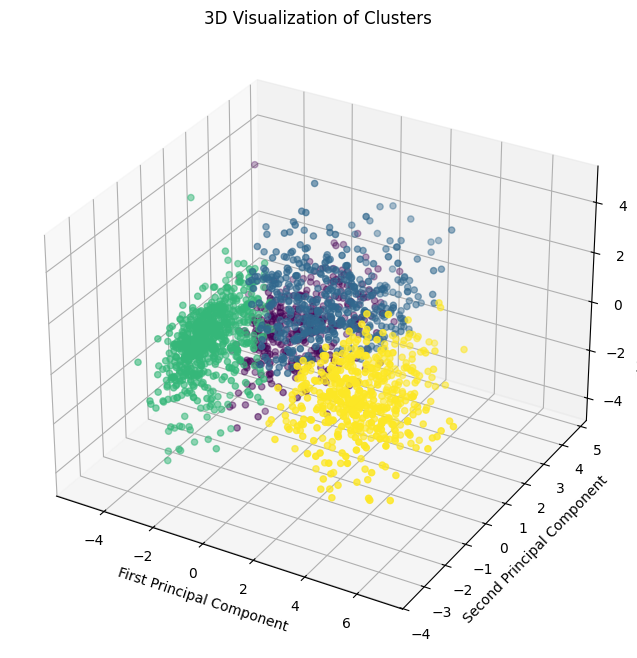

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# running final model with 4 clusters
kmeans_4 = KMeans(n_clusters = 4, random_state =42)
kmeans_4.fit(pca_data)
labels = kmeans_4.labels_

# creating a #D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plotting points
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2],
                    c=labels, cmap='viridis')

# Add labels and title
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('3D Visualization of Clusters')

# Add colorbar
ax.legend(scatter)
plt.show()

This graph illustrates our four clusters in a three dimensional space. There is some overlap in the center of the illsutration, as points from all four clusters are near each other. This is not surprsing considering the close to 0 sillhouette scores of this model. The yellow and green clusters appear to be the most well defined as most of their points are farther from the other clusters. The yellow clusters are mainly in the lower right area, while the green ones are more concentrated in the left side. However, it is important to note that since this is a 3D represnetation it is hard to assess the extent in which the blue clusters overlap with the purple. It appears that the blue clusters are positioned closed to the center towards the upper region while the purple seem to be below them.  

The clusters appear to have different sizes, indicating customer segments of varying sizes. Overall, cluster borders are to some extent well defined suggesting there are distinctions between customer segments.  

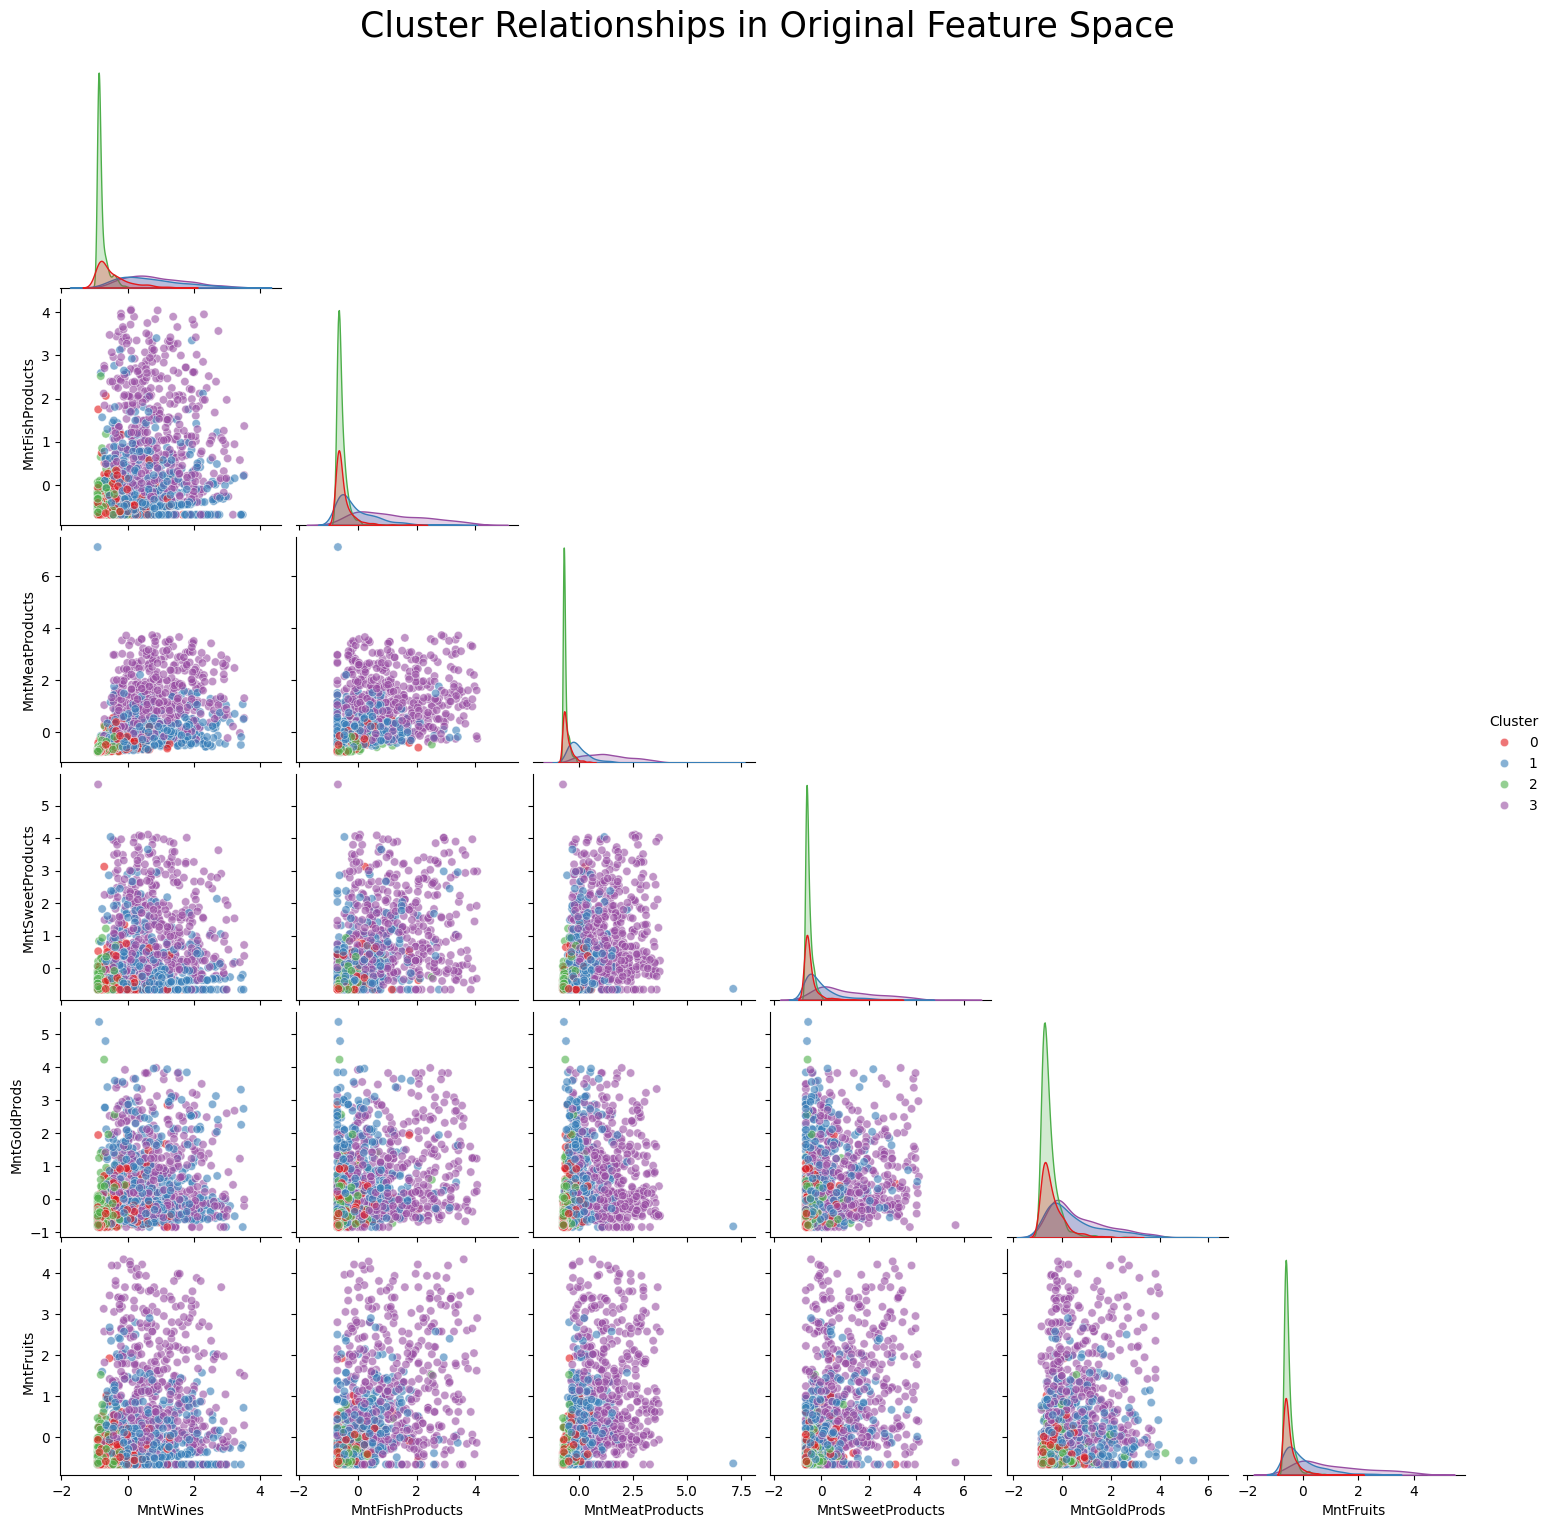

In [37]:
# creating a pairwise plot with several variables
original_df = marketing_df_normalized.copy()  # your original dataframe
original_df['Cluster'] = labels

# creating a color palette for 4 colors
colors = sns.color_palette('Set1', n_colors=4)

# creating pairplot with original features
pplot = sns.pairplot(original_df,
             vars=['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', "MntFruits"],
             hue='Cluster',
             palette = colors,
             corner = True,
             plot_kws={'alpha': 0.6})

plt.suptitle('Cluster Relationships in Original Feature Space', y=1.02, size = 25)
plt.show()

# Models

* Feature selection (like k-fold, etc.)
* Balancing and standardization
* Our three models

## RF
Random Forest is a 

In [40]:
# encode Education, Marital_Status, and Age as numerical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
marketing_df['Education'] = label_encoder.fit_transform(marketing_df['Education'])
marketing_df['Marital_Status'] = label_encoder.fit_transform(marketing_df['Marital_Status'])
marketing_df['Age'] = label_encoder.fit_transform(marketing_df['Age'])

# dropping Dt_customer as it was considered irrelevant in our case
marketing_df = marketing_df.drop(['Dt_Customer'], axis=1)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(marketing_df.drop("AcceptedCmp", axis =1), marketing_df["AcceptedCmp"], test_size=0.2, random_state=42)

# starting the baseline model without changing any hyperparameters
rf_base = RandomForestClassifier(random_state= 42)
rf_base.fit(X_train, y_train)

# calculating accuracy_scores, F1 scores, precison, and recall scores

### making predictions
y_train_pred_rf_base = rf_base.predict(X_train)
y_test_pred_rf_base = rf_base.predict(X_test)

 
### calculating accuracy scores
train_acc_score = accuracy_score(y_train, y_train_pred_rf_base)
test_acc_score = accuracy_score(y_test, y_test_pred_rf_base)


print("Train set accuracy:", train_acc_score )
print("Test set accuracy:", test_acc_score )

Train set accuracy: 0.996268656716418
Test set accuracy: 0.7965260545905707


As we can see, compared to our train set, the accurcy on our test set is way smaller. There is around 20% less accurcy in our test set, indicaing our model suffers from overfitting. To finetune our model cross-validation, and grid search will be inplemented. The code below shows the performance of the model (by only looking at the test set) on other measures. 

In [44]:
# calculate other metrics for the test set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report

precision_rf_b = precision_score(y_test, y_test_pred_rf_base)
recall_rf_b = recall_score(y_test, y_test_pred_rf_base)
f1__rf_b = f1_score(y_test, y_test_pred_rf_base)
roc_auc_rf_b = roc_auc_score(y_test, rf_base.predict_proba(X_test)[:, 1])

print(f'Precision (RF): {precision_rf_b:.2f}')
print(f'Recall (RF): {recall_rf_b:.2f}')
print(f'F1-score (RF): {f1__rf_b:.2f}')
print(f'ROC-AUC score (RF): {roc_auc_rf_b:.2f} \n')
print(classification_report(y_test, y_test_pred_rf_base))


Precision (RF): 0.75
Recall (RF): 0.47
F1-score (RF): 0.58
ROC-AUC score (RF): 0.83 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



We begin by finding the optimal `max_depth`of our model by comparing several depths and calculating cross-validation scores

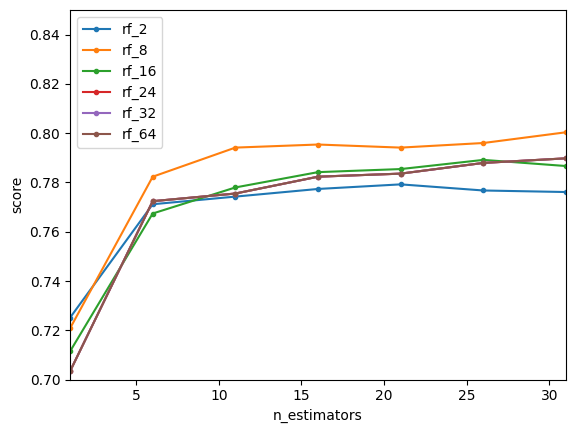

In [56]:
# the following code was gotten from the lab (but modified for simplicity and to apply it to our data), 
# as what was learned there was applied to this assignment. 
# Full credit goes to Renato 
from IPython import display
from sklearn.model_selection import cross_val_score

# function used to create visualizations that will help us determine the optimal number of max_depth
def plot_live(X, y, evaluator, param_name, param_range, scale='log', ylim=(0.7,0.85), ylabel='score', marker = '.'):
    """ Renders a plot that updates with every evaluation from evaluator.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    evaluator -- a function with signature (X, y, param_value) that returns a dictionary of scores.
                 Examples: {"train": 0.9, "test": 0.95} or {"model_1": 0.9, "model_2": 0.7}
    param_name -- the parameter that is being varied on the X axis. Can be a hyperparameter, sample size,...
    param_range -- list of all possible values on the x-axis
    scale -- defines which scale to plot the x-axis on, either 'log' (logarithmic) or 'linear'
    ylim -- tuple with the lowest and highest y-value to plot (e.g. (0, 10))
    ylabel -- the y-axis title
    """
    # Plot interactively
    plt.ion()
    plt.ylabel(ylabel)
    plt.xlabel(param_name)
    
    # Make the scale look nice
    plt.xscale(scale)
    plt.xlim(param_range[0],param_range[-1])
    plt.ylim(ylim)
        
    # Start from empty plot, then fill it
    series = {}
    lines = {}
    xvals = []
    for i in param_range:
        scores = evaluator(X, y, i) 
        if i == param_range[0]: # initialize series
            for k in scores.keys():
                lines[k], = plt.plot(xvals, [], marker = marker, label = k)
                series[k] = []
        xvals.append(i)
        for k in scores.keys(): # append new data
            series[k].append(scores[k])
            lines[k].set_data(xvals, series[k])
        # refresh plot
        plt.legend(loc='best')
        plt.margins(0.1)
        display.display(plt.gcf())
        display.clear_output(wait=True)

# funcition used to run several random forest models with varying depths 
def evaluate_RF(X, y, n_estimators, max_depths, scoring):
    res = {}

    for md in max_depths:
        forest = RandomForestClassifier(n_estimators, max_depth=md, random_state=42)
        rf = cross_val_score(forest, X, y, cv=5, scoring=scoring)
        res['rf_' + str(md)] = sum(rf)/len(rf)

    return res

def evaluate_RF_accuracy(X, y, n_estimators):
    return evaluate_RF(X, y, n_estimators, max_depths=[2, 8, 16, 24, 32, 64], scoring="accuracy")


plot_live(X_train, y_train, evaluator = evaluate_RF_accuracy, param_name='n_estimators', param_range=range(1, 32, 5), scale='linear')


Initially, when looking at a low number of estimators the random forest model with a depth of 2 performed the best. This quickly changed after passing ~4 number of estimators, the model with depth 8 mainly outperformed the rest by an evident margin.The random forest model with depth 32 seems to be follwing the same trend as the model with depth 64 (which expalins why the line is not very visible in the plot). This illustrtes that after a certain point adding more complexity to the model actually does not lead to better results (and sometimes even worse when compared to the depth 8 model). Another reason for the lines to behave the same is likely because the trees do not grow much deeper on this dataset. Based on this illutration the optimal max_depth of the tree was chosen to be 8.

Now we will look at another fine tuning technique that is used to determine the best hyperparamters: gridsearch. Gridseach will be performed to fine tune n_estimators (how many tress to grow), max_features (number of features), and criterion, along with 5-fold cross-validation.  

In [68]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [6, 8, 10, 12], 
    'max_features': [10, 15, 20, 25],
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
}

grid_searches_rf = GridSearchCV(rf_grid, param_grid, cv = 5, scoring='accuracy', n_jobs=-1)
model_grid_rf = grid_searches_rf.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid_rf.best_params_))
print('Best score is: ' + str(model_grid_rf.best_score_))

c:\Users\daran\miniconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters are {'criterion': 'entropy', 'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
Best score is: 0.8053327141502681


In [72]:
# defining model with best parameters based on the grid search 
best_rf_model = model_grid_rf.best_estimator_

# make predictions on both train and test sets
y_train_pred_best_rf_model = best_rf_model.predict(X_train)
y_test_pred_best_rf_model = best_rf_model.predict(X_test)

# calculate train and test accuracy
train_accuracy_best_xgb_model = accuracy_score(y_train, y_train_pred_best_rf_model)
test_accuracy_best_xgb_model = accuracy_score(y_test, y_test_pred_best_rf_model)

print(f'Train accuracy (best RF model): {train_accuracy_best_xgb_model:.2f}')
print(f'Test accuracy (best RF model): {test_accuracy_best_xgb_model:.2f}')

Train accuracy (best RF model): 0.96
Test accuracy (best RF model): 0.78


In [73]:
# calculate other metrics for the test set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report

precision_rf_b = precision_score(y_test, y_test_pred_best_rf_model)
recall_rf_b = recall_score(y_test, y_test_pred_best_rf_model)
f1__rf_b = f1_score(y_test, y_test_pred_best_rf_model)
roc_auc_rf_b = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print(f'Precision (RF): {precision_rf_b:.2f}')
print(f'Recall (RF): {recall_rf_b:.2f}')
print(f'F1-score (RF): {f1__rf_b:.2f}')
print(f'ROC-AUC score (RF): {roc_auc_rf_b:.2f} \n')
print(classification_report(y_test, y_test_pred_rf_base))

Precision (RF): 0.69
Recall (RF): 0.47
F1-score (RF): 0.56
ROC-AUC score (RF): 0.82 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



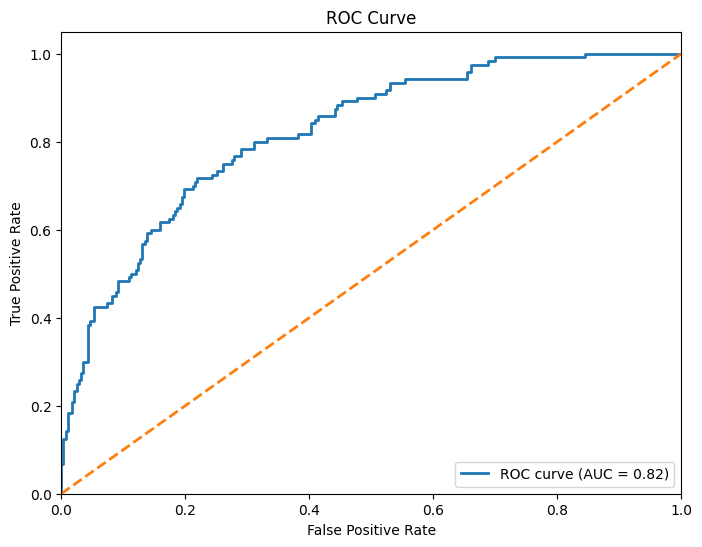

In [75]:
from sklearn.metrics import roc_curve
# get predicted probabilities for the positive class for the test set
y_test_pred_prob_best_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_best_rf_model)
roc_auc = roc_auc_score(y_test, y_test_pred_prob_best_rf_model)

# plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

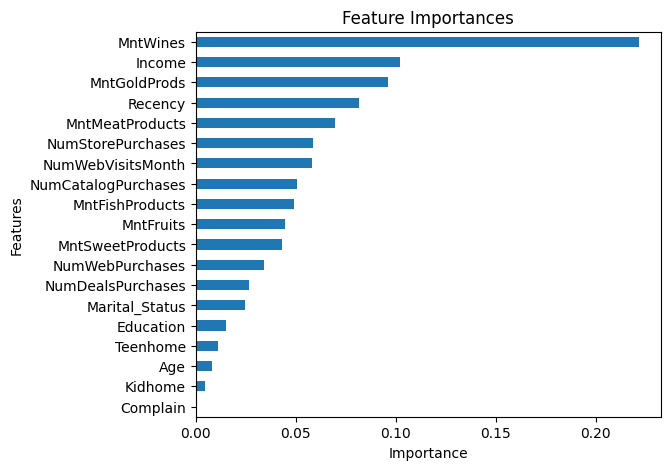

In [76]:
# get feature importances from the best model
X = marketing_df.drop(['AcceptedCmp'], axis=1)
feature_importances = best_rf_model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values()

# plotting the feature importances
plt.figure(figsize=(6, 5))
feature_importance_series.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

As we can see the most important features for determining whether a marketing campaign was accepted or not are `MntWines`(by a much greater extent), `Income`, and `MntGoldProds`. `Complain` does not seem to have any importance to this classification. Other features that barely have any importance include `Kidhome`, `Age`, `Teenhome`, `Education`, `Marital_Status`, `NumDealsPurchases`, and `NumWebPurchases`, hence, a new model exclusing these variables will be run as an attempt to reduce overfitting. 

Additionally, this model will be run using the optimal features the model above found. 

In [86]:
# dropping variables 'Complain', 'Kidhome', "Age" 'slope', 'wilderness_area' from X_train_scaled
X_train_less_feat = X_train.drop(['Complain', 'Kidhome', "Teenhome", 'Age', 'Education','Marital_Status', 'NumDealsPurchases', 'NumWebPurchases' ], axis=1)
X_test_less_feat = X_test.drop(['Complain', 'Kidhome', "Teenhome", 'Age', 'Education','Marital_Status', 'NumDealsPurchases', 'NumWebPurchases' ], axis=1)

# running model with less features 
rf_less_feat = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 20, n_estimators= 250, random_state=42)
rf_less_feat.fit(X_train_less_feat, y_train)

### making predictions
y_train_pred_rf_less_feat = rf_less_feat.predict(X_train_less_feat)
y_test_pred_rf_less_feat = rf_less_feat.predict(X_test_less_feat)

 
### calculating accuracy scores
train_acc_score = accuracy_score(y_train, y_train_pred_rf_less_feat)
test_acc_score = accuracy_score(y_test, y_test_pred_rf_less_feat)


print("Train set accuracy:", train_acc_score )
print("Test set accuracy:", test_acc_score )

Train set accuracy: 0.9533582089552238
Test set accuracy: 0.7866004962779156


In [90]:
# calculate other metrics for the test set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report

precision_rf_b = precision_score(y_test, y_test_pred_rf_less_feat)
recall_rf_b = recall_score(y_test, y_test_pred_rf_less_feat)
f1__rf_b = f1_score(y_test, y_test_pred_rf_less_feat)
roc_auc_rf_b = roc_auc_score(y_test, rf_less_feat.predict_proba(X_test_less_feat)[:, 1])

print(f'Precision (RF): {precision_rf_b:.2f}')
print(f'Recall (RF): {recall_rf_b:.2f}')
print(f'F1-score (RF): {f1__rf_b:.2f}')
print(f'ROC-AUC score (RF): {roc_auc_rf_b:.2f} \n')
print(classification_report(y_test, y_test_pred_rf_base))

Precision (RF): 0.71
Recall (RF): 0.48
F1-score (RF): 0.57
ROC-AUC score (RF): 0.83 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



# Results

# Bibliography
Second-cycle programmes. (2023, November 27). https://eurydice.eacea.ec.europa.eu/national-education-systems/republic-north-macedonia/second-cycle-programmes#:~:text=Second%20cycle%20programs%20are%20provided,and%20awards%20a%20master%20degree.

Selecting the number of clusters with silhouette analysis on KMeans clustering. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html